In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import json
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import numpy

import sklearn.ensemble
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,classification_report,confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
from sklearn.pipeline import make_pipeline

#BERT random forest
import sys, setuptools, tokenize
import torch
#import tensorflow
#from tensorflow import keras
#import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import IntProgress

# BERT neural network
# need to make sure that you are running TensorFlow 2.0. Google Colab, by default, doesn't run your script on TensorFlow 2.0. 
# try:
#     %tensorflow_version 2.x
# except Exception:
#     pass
# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras import layers
#import bert
import math
import random
#import shap

from rdflib import Graph
import itertools

import pandas as pd
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

from nltk.corpus import stopwords
stop = stopwords.words('english')

from Text_representation import TF_IDF_for_Random_forest, BOW_matrix_for_Random_forest
import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")

In [2]:
df_raw = pd.read_csv('opencitation_df_with_abstract.csv')
display(df_raw.head())
display(df_raw.describe(include='all', percentiles=[]))

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,Volume,Year,Abstract_link,PMC,Abstract
0,[''],[''],0,10.1371/journal.pbio.0030199,6,https://journals.plos.org/plosbiology/article/...,e199,issn:1545-7885,Plos Biology,New Frameshifting Pseudoknot Found In Sars Virus,3,2005.0,http://ns.inria.fr/covid19/PMC1110910#abstract,PMC1110910,NaN
1,[''],['10.1128/jvi.01804-08'],1,10.1371/journal.pmed.0020274,8,https://journals.plos.org/plosmedicine/article...,e274,issn:1549-1676,Plos Medicine,A Novel Virus For Croup,2,2005.0,http://ns.inria.fr/covid19/PMC1188251#abstract,PMC1188251,NaN
2,[''],[''],0,10.1371/journal.pbio.0030353,10,https://journals.plos.org/plosbiology/article/...,e353,issn:1545-7885,Plos Biology,Casting A Wide Net To Fight Coronaviruses,3,2005.0,http://ns.inria.fr/covid19/PMC1197291#abstract,PMC1197291,NaN
3,"['Yang, Haitao', 'Xie, Weiqing', 'Xue, Xiaoyu'...","['10.1101/2020.02.26.964882', '10.1101/2020.03...",10,10.1371/journal.pbio.0030428,11,https://journals.plos.org/plosbiology/article/...,e428,issn:1545-7885,Plos Biology,Correction: Design Of Wide-Spectrum Inhibitors...,3,2005.0,http://ns.inria.fr/covid19/PMC1283410#abstract,PMC1283410,NaN
4,"['Kaplan, Warren A.']",[''],0,10.1038/sj.embor.7400320,1,https://europepmc.org/articles/pmc1299230?pdf=...,21-21,issn:1469-221X; issn:1469-3178,Embo Reports,Pushing And Pulling,6,2005.0,http://ns.inria.fr/covid19/PMC1299230#abstract,PMC1299230,NaN


,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,Volume,Year,Abstract_link,PMC,Abstract
count,16142,16142,16142.000000,16142,12616,15145,15273,14471,16101,16127,13888,16138.000000,16142,16142,5084
unique,10905,8042,NaN,16142,702,15142,9692,2810,3350,14820,567,NaN,16142,16142,4974
top,[''],[''],NaN,10.1038/246143a0,1,https://europepmc.org/articles/pmc3654146?pdf=...,3-3,issn:0140-6736,The Lancet,News In Brief,7,NaN,http://ns.inria.fr/covid19/PMC7152332#abstract,PMC7122042,Unknown
freq,3642,8064,NaN,1,1595,2,116,562,562,37,386,NaN,1,1,41
mean,NaN,NaN,14.210197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.948878,NaN,NaN,NaN
std,NaN,NaN,93.438528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.119648,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN
max,NaN,NaN,4885.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN


In [3]:
df_raw['Age']  = 2022- df_raw['Year']

In [4]:
df_raw["NormCitations"]= df_raw["Citation_count"]/df_raw['Age']

In [5]:
DISCRETIZATION_NUMBER_OF_CATEGORIES=2
DISCRETIZATION_PRECISION=0
DISCRETIZATION_LABELS=["low","high"]

In [6]:
#only print the boundaries
pd.qcut(df_raw["NormCitations"],q=DISCRETIZATION_NUMBER_OF_CATEGORIES, precision=0 ,duplicates='drop').value_counts()

(-0.1, 0.02]    8068
(0.02, inf]     8068
Name: NormCitations, dtype: int64

In [7]:
df_raw["Target"]=pd.qcut(df_raw["NormCitations"],
                            q=DISCRETIZATION_NUMBER_OF_CATEGORIES, 
                            precision=DISCRETIZATION_PRECISION, 
                            labels=DISCRETIZATION_LABELS)

In [8]:
df_raw["Target"].value_counts()

low     8068
high    8068
Name: Target, dtype: int64

In [9]:
#documents = documents.drop_duplicates(subset=['pubmed_id'], keep=False)
df_raw = df_raw.drop_duplicates(subset=['DOI','Journal_name'], keep=False)
#documents = documents.set_index("PMC")
df_raw = df_raw[df_raw["Title"].str.contains("NaN")==False]
df_raw['Title'] = df_raw['Title'].str.lower()
df_raw = df_raw[df_raw['Abstract'].notna()]
df_raw['Title_Abstract'] = df_raw['Title'] + df_raw['Abstract']
df_raw = df_raw[df_raw["Target"].str.contains("NaN")==False]

In [10]:
df_raw['stopwords_removed_title'] = df_raw['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_raw['stopwords_removed_abstract'] = df_raw['Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_raw['stopwords_removed_title_abstract'] = df_raw['Title_Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [11]:
# df_raw['Scispacy_entity_0'] = np.nan
# df_raw['Scispacy_entity_1'] = np.nan
# df_raw['Scispacy_entity_2'] = np.nan
# df_raw['Scispacy_entity_3'] = np.nan


# row, col = df_raw.shape
# for i in range(0,row,1):
#     sample_transcription = df_raw['stopwords_removed_title'].iloc[i]
#     #print(sample_transcription) # prints just the first 1000 characters
#     doc = nlp(sample_transcription)
#     #print("TEXT", "START", "END", "ENTITY TYPE")
#     #index_count = 0
#     try:
#         #print(doc.ents[0])
#         df_raw['Scispacy_entity_0'][i] = str(doc.ents[0])
#     except:
#         pass
#     try:
#         #print(doc.ents[1])
#         df_raw['Scispacy_entity_1'][i] = str(doc.ents[1])
#     except:
#         pass
#     try:
#         #print(doc.ents[1])
#         df_raw['Scispacy_entity_2'][i] = str(doc.ents[2])
#     except:
#         pass
#     try:
#         #print(doc.ents[1])
#         df_raw['Scispacy_entity_3'][i] = str(doc.ents[3])
#     except:
#         pass

In [12]:
# display(df_raw.describe(include='all', percentiles=[]))
df_raw = df_raw.reset_index(drop=True)
df_raw

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,...,Abstract_link,PMC,Abstract,Age,NormCitations,Target,Title_Abstract,stopwords_removed_title,stopwords_removed_abstract,stopwords_removed_title_abstract
0,"['Breithaupt, Holger']","['10.1038/srep11376', '10.1128/jvi.79.4.2001-2...",6,10.1038/sj.embor.embor949,10,https://europepmc.org/articles/pmc1326407?pdf=...,921-924,issn:1469-221X; issn:1469-3178,Embo Reports,fierce creatures,...,http://ns.inria.fr/covid19/PMC1326407#abstract,PMC1326407,"Zoonoses, diseases that jump from animals to h...",19.0,0.315789,high,"fierce creaturesZoonoses, diseases that jump f...",fierce creatures,"Zoonoses, diseases jump animals humans, growin...","fierce creaturesZoonoses, diseases jump animal..."
1,"['Eysenbach, Gunther']","['10.1080/13602380600571443', '10.1007/978-2-8...",52,10.2196/jmir.5.2.e14,2,https://doi.org/10.2196/jmir.5.2.e14,e14,issn:1438-8871,Journal Of Medical Internet Research,sars and population health technology,...,http://ns.inria.fr/covid19/PMC1550560#abstract,PMC1550560,The recent global outbreak of SARS (severe acu...,19.0,2.736842,high,sars and population health technologyThe recen...,sars population health technology,The recent global outbreak SARS (severe acute ...,sars population health technologyThe recent gl...
2,"['Kittler, Anne F', 'Hobbs, John', 'Volk, Lynn...","['10.1111/j.1539-6924.2011.01623.x', '10.1080/...",49,10.2196/jmir.6.1.e8,1,https://doi.org/10.2196/jmir.6.1.e8,e8,issn:1438-8871,Journal Of Medical Internet Research,the internet as a vehicle to communicate healt...,...,http://ns.inria.fr/covid19/PMC1550585#abstract,PMC1550585,BACKGROUND: The recent public health risks ari...,18.0,2.722222,high,the internet as a vehicle to communicate healt...,internet vehicle communicate health informatio...,BACKGROUND: The recent public health risks ari...,internet vehicle communicate health informatio...
3,"['Rizo, Carlos A', 'Lupea, Doina', 'Baybourdy,...","['10.1093/pubmed/fdp080', '10.1097/phh.0b013e3...",14,10.2196/jmir.7.4.e46,4,https://asset.jmir.pub/assets/71c7163a49d8cb92...,e46,issn:1438-8871,Journal Of Medical Internet Research,what internet services would patients like fro...,...,http://ns.inria.fr/covid19/PMC1550678#abstract,PMC1550678,BACKGROUND: International health organizations...,17.0,0.823529,high,what internet services would patients like fro...,internet services would patients like hospital...,BACKGROUND: International health organizations...,internet services would patients like hospital...
4,"['Gau, Vincent', 'Ma, Shu-Ching', 'Wang, Hua',...","['10.1039/b705672a', '10.1007/978-1-4020-8480-...",93,10.1016/j.ymeth.2005.05.008,1,https://doi.org/10.1016/j.ymeth.2005.05.008,73-83,issn:1046-2023,Methods,electrochemical molecular analysis without nuc...,...,http://ns.inria.fr/covid19/PMC1564062#abstract,PMC1564062,Electrochemical biosensors have revolutionized...,17.0,5.470588,high,electrochemical molecular analysis without nuc...,electrochemical molecular analysis without nuc...,Electrochemical biosensors revolutionized gluc...,electrochemical molecular analysis without nuc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,"['Martin-Loeches, Ignacio, 0000-0002-5834-4063...","['10.1172/jci150473', '10.3389/fmed.2021.67171...",8,10.1186/s13054-020-03219-4,1,https://ccforum.biomedcentral.com/track/pdf/10...,NaN,issn:1364-8535,Critical Care,the importance of airway and lung microbiome i...,...,http://ns.inria.fr/covid19/PMC7457224#abstract,PMC7457224,"During critical illness, there are a multitude...",2.0,4.000000,high,the importance of airway and lung microbiome i...,importance airway lung microbiome critically ill,"During critical illness, multitude forces anti...",importance airway lung microbiome critically i...
5075,"['Xie, Yewei', 'Wang, Zaisheng', 'Liao, Huipen...","['10.1002/adtp.202000172', '10.3389/fmed.2020....",53,10.1186/s12879-020-05371-2,1,https://bmcinfectdis

## Scikit-learn baseline classification

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

label_binarizer = preprocessing.LabelBinarizer()
y = label_binarizer.fit_transform(df_raw['Target']).ravel()
#X = df_raw[['User Rating', 'Reviews', 'Price', 'Year']] # df_raw.drop(columns='Genre')#
X = df_raw.drop(columns='Target')
matrix_bow_pd, matrix_bow, vect_bow  = BOW_matrix_for_Random_forest.bow_matrix_for_random_forest(df_raw,'stopwords_removed_title')
#X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.33, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(matrix_bow_pd, df_raw.Target, test_size=0.30, random_state=1)

In [14]:
matrix_bow_pd

,19,19 pandemic,19 patients,2019,2019 covid,2019 covid 19,2020,activity,acute,acute respiratory,...,treatment,trial,use,using,vaccine,viral,virus,virus infection,viruses,vitro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5075,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5076,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5077,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
rf = RandomForestClassifier(bootstrap= True, max_depth= 1000, max_features= 10, min_samples_leaf= 1, min_samples_split= 100, n_estimators= 500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1000, max_features=10, min_samples_split=100,
                       n_estimators=500)

In [16]:
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

        high       0.84      0.85      0.85      1101
         low       0.60      0.57      0.58       423

    accuracy                           0.77      1524
   macro avg       0.72      0.71      0.71      1524
weighted avg       0.77      0.77      0.77      1524



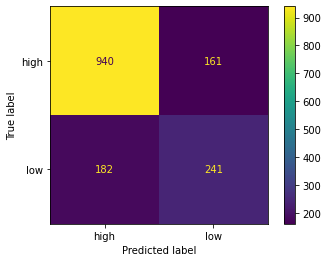

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, target_names=label_binarizer.classes_))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_binarizer.classes_).plot()
plt.show()

In [18]:
pd.set_option('display.max_colwidth', None) # for full width column

ind = np.argsort(rf.feature_importances_)[-15:]

pd.DataFrame({
    'features': matrix_bow_pd.columns[ind], 
    'importance': rf.feature_importances_[ind]
}).sort_values('importance', ascending=False)

,features,importance
14,des,0.033144
13,virus,0.030971
12,et,0.030420
11,covid 19,0.024056
10,en,0.022338
9,la,0.021715
8,covid,0.020877
7,study,0.020570
6,19,0.020348
5,infection,0.017770
